In [7]:
import numpy as np

np.random.seed=42

num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)



In [8]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [9]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))


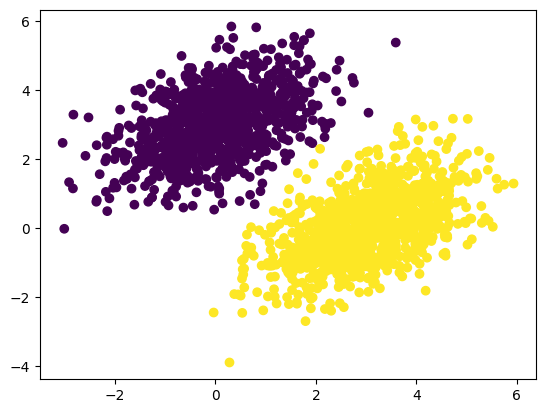

In [10]:

import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()


In [11]:
import tensorflow as tf

input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))


In [12]:
# tensorflow : __call__(), pytorch : forward() => 정방향 패스 설정
def model(inputs):
    return tf.matmul(inputs, W) + b # 예측값 output 정방향 패스 타고 나오면 예측값. 


In [13]:

def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)


In [14]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss


In [15]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"{step}번째 스텝의 손실: {loss:.4f}")


0번째 스텝의 손실: 4.1153
1번째 스텝의 손실: 0.4141
2번째 스텝의 손실: 0.1611
3번째 스텝의 손실: 0.1179
4번째 스텝의 손실: 0.1056
5번째 스텝의 손실: 0.0982
6번째 스텝의 손실: 0.0920
7번째 스텝의 손실: 0.0863
8번째 스텝의 손실: 0.0812
9번째 스텝의 손실: 0.0765
10번째 스텝의 손실: 0.0722
11번째 스텝의 손실: 0.0682
12번째 스텝의 손실: 0.0646
13번째 스텝의 손실: 0.0613
14번째 스텝의 손실: 0.0582
15번째 스텝의 손실: 0.0554
16번째 스텝의 손실: 0.0529
17번째 스텝의 손실: 0.0505
18번째 스텝의 손실: 0.0484
19번째 스텝의 손실: 0.0464
20번째 스텝의 손실: 0.0446
21번째 스텝의 손실: 0.0429
22번째 스텝의 손실: 0.0414
23번째 스텝의 손실: 0.0400
24번째 스텝의 손실: 0.0387
25번째 스텝의 손실: 0.0375
26번째 스텝의 손실: 0.0365
27번째 스텝의 손실: 0.0355
28번째 스텝의 손실: 0.0346
29번째 스텝의 손실: 0.0337
30번째 스텝의 손실: 0.0330
31번째 스텝의 손실: 0.0323
32번째 스텝의 손실: 0.0316
33번째 스텝의 손실: 0.0310
34번째 스텝의 손실: 0.0305
35번째 스텝의 손실: 0.0300
36번째 스텝의 손실: 0.0296
37번째 스텝의 손실: 0.0291
38번째 스텝의 손실: 0.0288
39번째 스텝의 손실: 0.0284


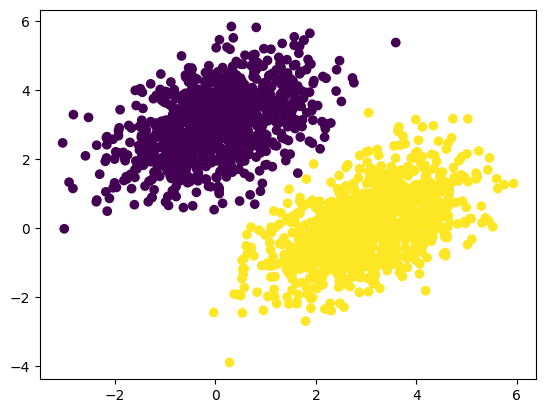

In [16]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

  

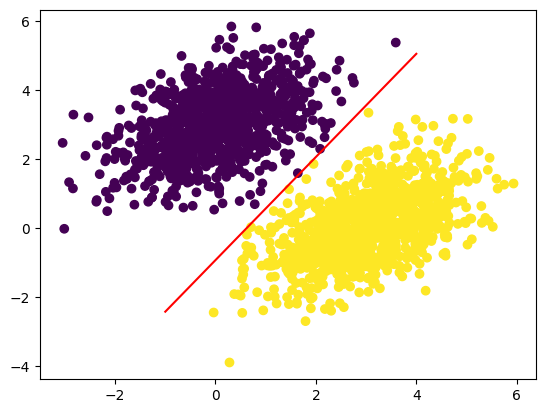

In [17]:
x = np.linspace(-1, 4, 100)
# 사실 100개의 x 축 좌표를 만들 필요 없이 시작과 종료 위치만 있어도 됩니다.
# x = [-1, 4]
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()
